Introduce the Problem: Is there some sort of significance between what social media people look at first and their school status level? The question being answered is do college students use apps such as LinkedIn more than others such as snapchat, Instagram or Twitter. What I intend to look at is what social media platforms those in college are using.


The Data: The data was found on Kaggle.com but comes from Whatsgoodly, a milllenial social polling company. There are 500 samples within the dataset and it was published 3/17/17. This dataset asks a question of what social media do you open first on your phone when you see you have a notification. Some features of the dataset are segment, segment-description, ansder, count, and percentage



In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
import seaborn as sns

In [60]:
# Read dataset
social_media_DF = pd.read_csv('WhatsgoodlyData-10.csv')

social_media_DF.head()

,Question,Segment Type,Segment Description,Answer,Count,Percentage
0,You open ur phone and have a notif badge on in...,Mobile,Mobile respondents,Instagram,2559,0.273
1,You open ur phone and have a notif badge on in...,Mobile,Mobile respondents,Facebook,1182,0.126
2,You open ur phone and have a notif badge on in...,Mobile,Mobile respondents,Snapchat,5423,0.579
3,You open ur phone and have a notif badge on in...,Mobile,Mobile respondents,Linkedin,210,0.022
4,You open ur phone and have a notif badge on in...,Web,Web-based respondents,Instagram,30,0.256


In [61]:
social_media_DF.columns



Index(['Question', 'Segment Type', 'Segment Description', 'Answer', 'Count',
       'Percentage'],
      dtype='object')

In [62]:
social_media_DF.dropna()

,Question,Segment Type,Segment Description,Answer,Count,Percentage
0,You open ur phone and have a notif badge on in...,Mobile,Mobile respondents,Instagram,2559,0.273
1,You open ur phone and have a notif badge on in...,Mobile,Mobile respondents,Facebook,1182,0.126
2,You open ur phone and have a notif badge on in...,Mobile,Mobile respondents,Snapchat,5423,0.579
3,You open ur phone and have a notif badge on in...,Mobile,Mobile respondents,Linkedin,210,0.022
4,You open ur phone and have a notif badge on in...,Web,Web-based respondents,Instagram,30,0.256
...,...,...,...,...,...,...
511,You open ur phone and have a notif badge on in...,Custom,your parents make? $50K-$90K,Linkedin,4,0.015
512,You open ur phone and have a notif badge on in...,Custom,Mac or PC? Other 🐧,Instagram,5,0.217
513,You open ur phone and have a notif badge on in...,Custom,Mac or PC? Other 🐧,Facebook,6,0.261
514,You open ur phone and have a notif badge on in...,Custom,Mac or PC? Other 🐧,Snapchat,11,0.478


Pre-processing the Data: The main thing done in this step was find the relevant segment type that corresponds to what I am looking into. In my case I wanted to look at college students and highschoolers. I am curious to see whether or not college and highschool students spend their time on linkedin compared to other platforms. This will be interesting to see becasue this is a time period when making work-force connections is prime and seeing how often this platfrom is used in comparison to others.    

In [63]:
social_media_DF.iloc[20:324, 2:6]



,Segment Description,Answer,Count,Percentage
20,Alfred State University,Instagram,0,0.000
21,Alfred State University,Facebook,1,1.000
22,Alfred State University,Snapchat,0,0.000
23,Alfred State University,Linkedin,0,0.000
24,Johns Hopkins University,Instagram,2,0.053
...,...,...,...,...
319,University of Wisconsin-Madison,Linkedin,4,0.063
320,Ohio State University,Instagram,8,0.348
321,Ohio State University,Facebook,2,0.087
322,Ohio State University,Snapchat,12,0.522


In [64]:
df2 = social_media_DF.iloc[20:324, 2:6]


In [65]:
count = (df2['Count'] == 0).sum()
print('Count of zeros in Column  Count : ', count)

Count of zeros in Column  Count :  137


In [66]:
df3=df2[df2!=0].dropna()


In [67]:
df2.head()

,Segment Description,Answer,Count,Percentage
20,Alfred State University,Instagram,0,0.000
21,Alfred State University,Facebook,1,1.000
22,Alfred State University,Snapchat,0,0.000
23,Alfred State University,Linkedin,0,0.000
24,Johns Hopkins University,Instagram,2,0.053


In [68]:
df3.tail(20)

,Segment Description,Answer,Count,Percentage
303,Appalachian State University,Linkedin,1.0,0.025
304,Emory University,Instagram,8.0,0.276
305,Emory University,Facebook,8.0,0.276
306,Emory University,Snapchat,12.0,0.414
307,Emory University,Linkedin,1.0,0.034
308,University of Arizona,Instagram,9.0,0.290
309,University of Arizona,Facebook,4.0,0.129
310,University of Arizona,Snapchat,18.0,0.581
312,Truman State University,Instagram,9.0,0.300
313,Truman State University,Facebook,9.0,0.300


In [69]:
df3.loc[df3['Answer'] == 'Instagram'].sum()

Segment Description    Johns Hopkins UniversityUniversity of New Hamp...
Answer                 InstagramInstagramInstagramInstagramInstagramI...
Count                                                              505.0
Percentage                                                        22.086
dtype: object

In [70]:
df3.loc[df3['Answer'] == 'Facebook'].sum()

Segment Description    Alfred State UniversityJohns Hopkins Universit...
Answer                 FacebookFacebookFacebookFacebookFacebookFacebo...
Count                                                              354.0
Percentage                                                        12.815
dtype: object

In [71]:
df3.loc[df3['Answer'] == 'Snapchat'].sum()

Segment Description    Johns Hopkins UniversityChapman UniversityHill...
Answer                 SnapchatSnapchatSnapchatSnapchatSnapchatSnapch...
Count                                                             1013.0
Percentage                                                        37.879
dtype: object

In [72]:
df3.loc[df3['Answer'] == 'Linkedin'].sum()

Segment Description    Johns Hopkins UniversityUniversity of Virginia...
Answer                 LinkedinLinkedinLinkedinLinkedinLinkedinLinked...
Count                                                               75.0
Percentage                                                         3.222
dtype: object

In [73]:
social_media_DF = pd.DataFrame({'Answer': ['Snapchat', 'Instagram', 'Facebook','Linked']})

pd.get_dummies(social_media_DF["Answer"],prefix='Answer',drop_first=True)

,Answer_Instagram,Answer_Linked,Answer_Snapchat
0,0,0,1
1,1,0,0
2,0,0,0
3,0,1,0


In [74]:
df3.head()

,Segment Description,Answer,Count,Percentage
21,Alfred State University,Facebook,1.0,1.000
24,Johns Hopkins University,Instagram,2.0,0.053
25,Johns Hopkins University,Facebook,14.0,0.368
26,Johns Hopkins University,Snapchat,21.0,0.553
27,Johns Hopkins University,Linkedin,1.0,0.026


<AxesSubplot:xlabel='Answer', ylabel='Percentage'>

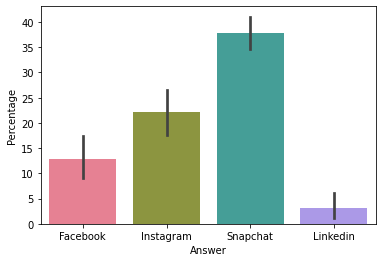

In [79]:
sns.barplot(x="Answer", y="Percentage", data=df3, estimator=sum, palette="husl")
